<a href="https://colab.research.google.com/github/ethannorona/C_117_Project/blob/main/C_117_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_to_load = files.upload()

Saving BankNote_Authentication.csv to BankNote_Authentication.csv


In [14]:
import pandas as pd

df = pd.read_csv("BankNote_Authentication.csv")
print(df.head())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [15]:
from sklearn.model_selection import train_test_split

X = df[['variance', 'skewness', 'curtosis', 'entropy']]
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
import seaborn as sns
import matplotlib.pyplot as plt

LR = LogisticRegression()
LR.fit(X_train, y_train)

y_prediction = LR.predict(X_test)

predicted_values = []
for i in y_prediction:
  if i == 0:
    predicted_values.append("Authorized")
  else:
    predicted_values.append("Forged")

actual_values = []
for i in y_test:
  if i == 0:
    actual_values.append("Authorized")
  else:
    actual_values.append("Forged")


[Text(0, 0.5, 'Forged'), Text(0, 1.5, 'Authorized')]

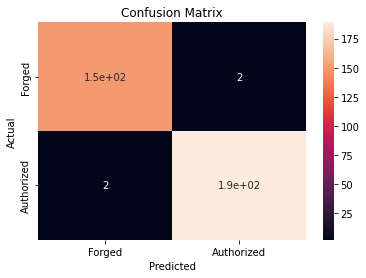

In [21]:
labels = ["Forged", "Authorized"]

cm = confusion_matrix(actual_values, predicted_values, labels)

ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)

In [23]:
tn, fp, fn, tp = confusion_matrix(y_test, y_prediction).ravel()
print("True Negatives: ",tn)
print("True Positives: ",tp)
print("False Negatives: ",fn)
print("False Positives: ",fp)

True Negatives:  189
True Positives:  150
False Negatives:  2
False Positives:  2


In [29]:
accuracy = (((tn + tp) * 100 )/ (tn + fp + fn + tp))
print("Accuracy is:- ",accuracy)

Accuracy is:-  98.83381924198251
